In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from models import ols_regression, manhattan_linear, gc

2024-10-07 08:27:42.549259: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-07 08:27:42.550114: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-07 08:27:42.552966: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-07 08:27:42.561195: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-07 08:27:42.574407: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
def min_max_scaling(X,min_val,max_val):
    X = np.array(X)
    X_min = np.min(X)
    X_max = np.max(X)
    
    # If the column has constant values (min == max), return the original values unscaled
    if X_min == X_max:
        return X
    
    # Perform scaling if min != max
    X_scaled = (X - X_min) / (X_max - X_min) * (max_val - min_val) + min_val

    
    return X_scaled

In [3]:
nr_people_pop1 = 500
nr_people_pop2 = 10
nr_people_pop3 = 300
total_humans = nr_people_pop1+ nr_people_pop2+nr_people_pop3
minaf_pop1 = 0.2
minaf_pop2 = 0.1
minaf_pop3 = 0.1

majaf_pop1 = 0.4
majaf_pop2 = 0.6
majaf_pop3 = 0.1

hetaf_pop1 = 1 - minaf_pop1 - majaf_pop1
hetaf_pop2 = 1 - minaf_pop2 - majaf_pop2
hetaf_pop3 = 1 - minaf_pop3 - majaf_pop3

pheno_pop1 = 0.3
pheno_pop2 = 0.7
pheno_pop3 = 0.1

In [4]:
# make snp
pop1_snps = [-1]*int(nr_people_pop1*minaf_pop1) + [0]*int(nr_people_pop1*hetaf_pop1) + [1]*int(nr_people_pop1*majaf_pop1)
pop2_snps = [-1]*int(nr_people_pop2*minaf_pop2) + [0]*int(nr_people_pop2*hetaf_pop2) + [1]*int(nr_people_pop2*majaf_pop2)
pop3_snps = [-1]*int(nr_people_pop3*minaf_pop3) + [0]*int(nr_people_pop3*hetaf_pop3) + [1]*int(nr_people_pop3*majaf_pop3)
nr_pop1_snps = [int(nr_people_pop1*minaf_pop1)]*int(nr_people_pop1*minaf_pop1) + [int(nr_people_pop1*hetaf_pop1)]*int(nr_people_pop1*hetaf_pop1) + [int(nr_people_pop1*majaf_pop1)]*int(nr_people_pop1*majaf_pop1)
nr_pop2_snps = [int(nr_people_pop2*minaf_pop2)]*int(nr_people_pop2*minaf_pop2) + [int(nr_people_pop2*hetaf_pop2)]*int(nr_people_pop2*hetaf_pop2) + [int(nr_people_pop2*majaf_pop2)]*int(nr_people_pop2*majaf_pop2)
nr_pop3_snps = [int(nr_people_pop3*minaf_pop3)]*int(nr_people_pop3*minaf_pop3) + [int(nr_people_pop3*hetaf_pop3)]*int(nr_people_pop3*hetaf_pop3) + [int(nr_people_pop3*majaf_pop3)]*int(nr_people_pop3*majaf_pop3)

snps = pop1_snps + pop2_snps + pop3_snps
snps_nr = nr_pop1_snps + nr_pop2_snps + nr_pop3_snps


In [5]:
minaf = [minaf_pop1]*nr_people_pop1 + [minaf_pop2]*nr_people_pop2 + [minaf_pop3]*nr_people_pop3
hetaf = [hetaf_pop1]*nr_people_pop1 + [hetaf_pop2]*nr_people_pop2 + [hetaf_pop3]*nr_people_pop3
majaf = [majaf_pop1]*nr_people_pop1 + [majaf_pop2]*nr_people_pop2 + [majaf_pop3]*nr_people_pop3

In [6]:
pop = ['pop1']*nr_people_pop1 + ['pop2']*nr_people_pop2 +  ['pop3']*nr_people_pop3
pop_nr = [nr_people_pop1]*nr_people_pop1 + [nr_people_pop2]*nr_people_pop2 +  [nr_people_pop3]*nr_people_pop3
risk = [pheno_pop1]*nr_people_pop1 + [pheno_pop2]*nr_people_pop2 +  [pheno_pop3]*nr_people_pop3

In [7]:
humans = pd.DataFrame()
humans['snp'] = snps
humans = pd.get_dummies(humans, columns=['snp'], dtype=int)
humans['snp'] = snps
humans['snp_nr'] = snps_nr
humans['snp_nr'] = humans['snp_nr']/humans['snp_nr'].max()

humans['minaf'] = minaf
humans['hetaf'] = hetaf
humans['majaf'] = majaf
humans['pop'] = pop
humans['pop_quantity'] = pop_nr
humans['risk'] = risk
#humans['risk'] = min_max_scaling(humans['risk'],-1,1)
#humans['risk'] = (humans['risk'] - humans['risk'].mean()) / humans['risk'].std()

In [8]:
pheno_pop1 = humans[humans['pop']=='pop1']['risk'].mean()
pheno_pop2 = humans[humans['pop']=='pop2']['risk'].mean()
pheno_pop3 = humans[humans['pop']=='pop3']['risk'].mean()

In [9]:
count_total_AFs = humans[['snp']].apply(pd.Series.value_counts)/len(humans)
total_minor = count_total_AFs.loc[-1].snp
total_het = count_total_AFs.loc[0].snp
total_major = count_total_AFs.loc[1].snp

In [10]:
total_major

0.291358024691358

In [11]:
"""
humans = humans[humans['snp'] != 0]
count_total_AFs = humans[['snp']].apply(pd.Series.value_counts)/len(humans)
total_minor = count_total_AFs.loc[-1].snp
total_major = count_total_AFs.loc[1].snp
humans
"""

"\nhumans = humans[humans['snp'] != 0]\ncount_total_AFs = humans[['snp']].apply(pd.Series.value_counts)/len(humans)\ntotal_minor = count_total_AFs.loc[-1].snp\ntotal_major = count_total_AFs.loc[1].snp\nhumans\n"

In [12]:
humans['risk'] = humans['risk']-humans['risk'].mean()

In [13]:
X = humans[['snp']]  # Predictor variable
y = humans['risk']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk'] = model.predict(X)

0.02620133102761616


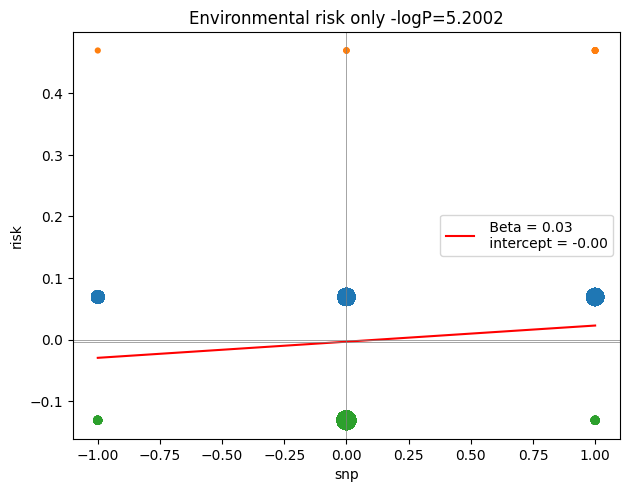

In [14]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp', y='risk', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp'], humans['predicted_risk'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

In [15]:
humans['corr'] = humans['snp_-1']*humans['minaf'] + humans['snp_1']*humans['majaf']

In [16]:
humans['corr'] = humans['snp']/humans['corr']

In [17]:
"""
if abs(humans['corr'].min()) > abs(humans['corr'].max()):
    humans['corr'] = humans['corr']/abs(humans['corr'].min())
else:
    humans['corr'] = humans['corr']/abs(humans['corr'].max())
    
#humans['corr'] = min_max_scaling(humans['corr'], -1, 1)
"""

"\nif abs(humans['corr'].min()) > abs(humans['corr'].max()):\n    humans['corr'] = humans['corr']/abs(humans['corr'].min())\nelse:\n    humans['corr'] = humans['corr']/abs(humans['corr'].max())\n    \n#humans['corr'] = min_max_scaling(humans['corr'], -1, 1)\n"

In [18]:
# Replace NaNs with 0
humans = humans.fillna(0)

# Replace infinities with 0
humans = humans.replace([np.inf, -np.inf], 0)

In [19]:
X = humans[['corr']]  # Predictor variable
y = humans['risk']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['corr']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['corr']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk'] = model.predict(X)

1.0842021724855044e-18


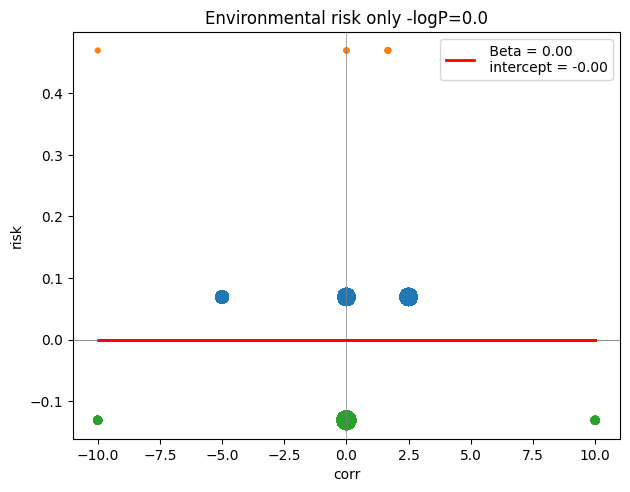

In [20]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='corr', y='risk', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['corr'], humans['predicted_risk'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}', linewidth=2)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

In [43]:
humans['risk_corr'] = humans.apply(lambda row: row['risk'] * -1 if row['snp'] == -1 else row['risk'], axis=1)

In [44]:
humans

,snp_-1,snp_0,snp_1,snp,snp_nr,minaf,hetaf,majaf,pop,pop_quantity,risk,predicted_risk,corr,abs_corr,pheno,risk_corr
0,1,0,0,-1,0.416667,0.2,0.4,0.4,pop1,500,0.069136,-1.973424,-5.0,5.0,-6.417642,-0.069136
1,1,0,0,-1,0.416667,0.2,0.4,0.4,pop1,500,0.069136,-1.973424,-5.0,5.0,-4.545097,-0.069136
2,1,0,0,-1,0.416667,0.2,0.4,0.4,pop1,500,0.069136,-1.973424,-5.0,5.0,-1.564155,-0.069136
3,1,0,0,-1,0.416667,0.2,0.4,0.4,pop1,500,0.069136,-1.973424,-5.0,5.0,-0.965073,-0.069136
4,1,0,0,-1,0.416667,0.2,0.4,0.4,pop1,500,0.069136,-1.973424,-5.0,5.0,0.267337,-0.069136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0,0,1,1,0.125000,0.1,0.8,0.1,pop3,300,-0.130864,5.050855,10.0,10.0,2.522206,-0.130864
806,0,0,1,1,0.125000,0.1,0.8,0.1,pop3,300,-0.130864,5.050855,10.0,10.0,-0.967237,-0.130864
807,0,0,1,1,0.125000,0.1,0.8,0.1,pop3,300,-0.130864,5.050855,10.0,10.0,0.953838,-0.130864
808,0,0,1,1,0.125000,0.1,0.8,0.1,pop3,300,-0.130864,5.050855,10.0,10.0,3.101118,-0.130864


In [45]:
X = humans[['corr']]  # Predictor variable
y = humans['risk_corr']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['corr']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['corr']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk'] = model.predict(X)

-1.0408340855860843e-17


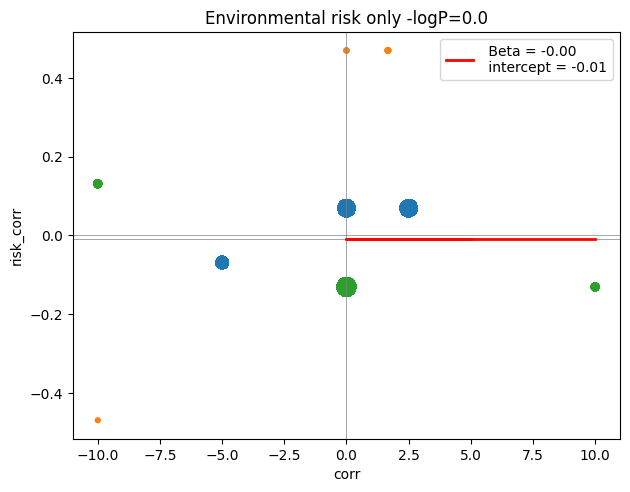

In [46]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='corr', y='risk_corr', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['abs_corr'], humans['predicted_risk'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}', linewidth=2)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

# Effect causal SNP

In [24]:
def divi(arr, effectsize):
    return [(1 / (num + 0.001)) * effectsize for num in arr]

def multi(arr, effectsize):
    return [num * effectsize for num in arr]

In [25]:
noise = 0.9
noise = 1-noise

In [26]:
effect = 3

In [27]:
humans['pheno'] = humans['snp']*effect

In [28]:
var_effect = np.var(humans['snp'])
total_variance = var_effect / noise
var_noise = total_variance - var_effect
sd_noise = np.sqrt(var_noise)
# Generate phenotype with noise
n = len(humans)
humans['pheno'] = humans['pheno'] + np.random.normal(0, sd_noise,n)
#humans['pheno'] = min_max_scaling(humans['pheno'], -1, 1)

In [29]:
X = humans[['snp']]  # Predictor variable
y = humans['pheno']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['snp']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk'] = model.predict(X)

2.809852399457688


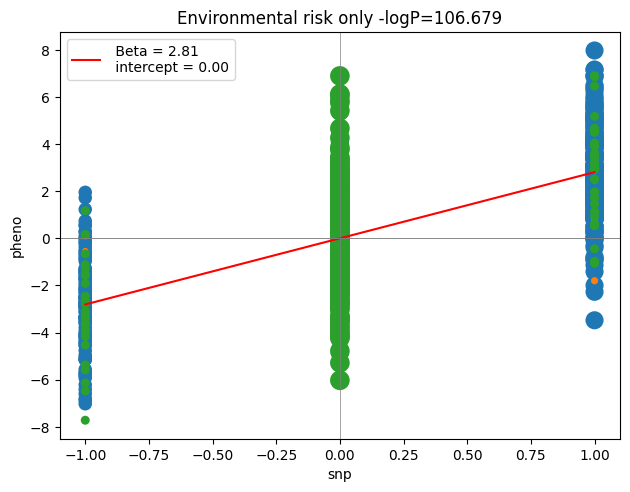

In [30]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp', y='pheno', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp'], humans['predicted_risk'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

In [31]:
X = humans[['corr']]  # Predictor variable
y = humans['pheno']    # Response variable

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['corr']
print(beta)
intercept = model.params['const']
p_value = model.pvalues['corr']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk'] = model.predict(X)

0.4682852946095567


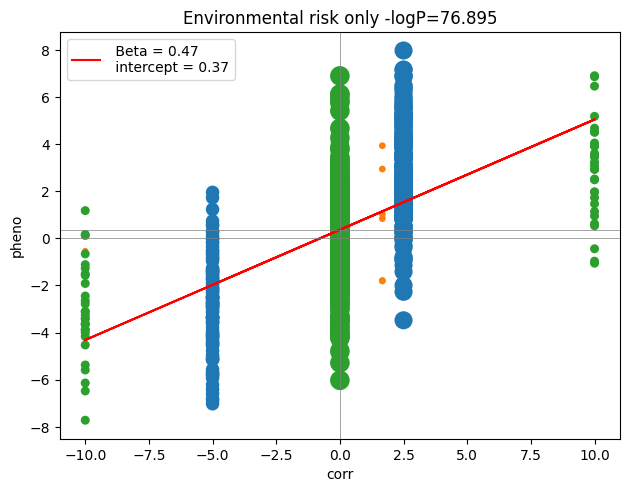

In [32]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='corr', y='pheno', data=humans, size='snp_nr', hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['corr'], humans['predicted_risk'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

In [145]:
# reproduce with mafs

In [146]:
expected_snp = humans['majaf']-humans['minaf']
variance_snp = humans['minaf']*(1-humans['minaf'])+humans['hetaf']*(1-humans['hetaf'])+humans['majaf']*(1-humans['majaf'])

In [147]:
expected_snp

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
805    0.0
806    0.0
807    0.0
808    0.0
809    0.0
Length: 810, dtype: float64

In [148]:
variance_snp/expected_snp

0      3.2
1      3.2
2      3.2
3      3.2
4      3.2
      ... 
805    inf
806    inf
807    inf
808    inf
809    inf
Length: 810, dtype: float64

In [149]:
humans['snp_variance']=expected_snp/sum(variance_snp)
humans['pheno'] = humans['risk']-humans['risk'].mean()

In [150]:
humans['snp_variance']

0      0.000468
1      0.000468
2      0.000468
3      0.000468
4      0.000468
         ...   
805    0.000000
806    0.000000
807    0.000000
808    0.000000
809    0.000000
Name: snp_variance, Length: 810, dtype: float64

In [151]:
X = humans[['snp_variance']]  # Predictor variable
y = humans['pheno']    # Response variable

# Add a constant to the predictor variable (for intercept)
#X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp_variance']
intercept = 0
p_value = model.pvalues['snp_variance']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_risk'] = model.predict(X)

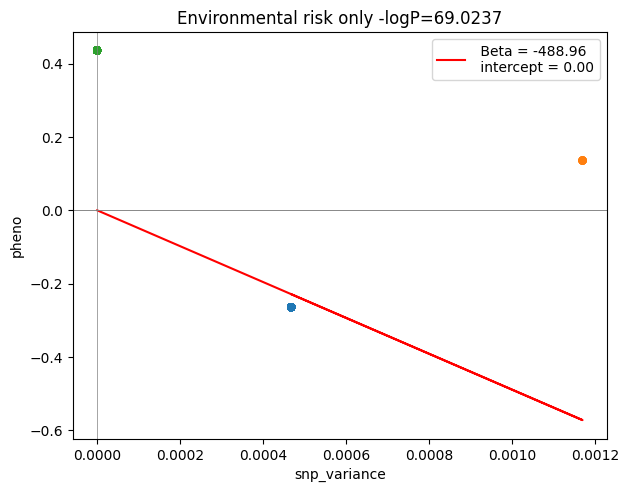

In [152]:
# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp_variance', y='pheno', data=humans, hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp_variance'], humans['predicted_risk'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

# Effect Causal SNP

In [116]:
def divi(arr, effectsize):
    return [(1 / (num + 0.001)) * effectsize for num in arr]

def multi(arr, effectsize):
    return [num * effectsize for num in arr]

In [117]:
noise = 0.01

In [118]:
humans['pheno'] = humans['snp']

In [123]:
var_effect = np.var(humans['snp'])
total_variance = var_effect / noise
var_noise = total_variance - var_effect
sd_noise = np.sqrt(var_noise)
# Generate phenotype with noise
n = len(humans)
humans['pheno'] = humans['pheno'] + np.random.normal(0, sd_noise,n)

#std_dev = np.std(humans['pheno'])
#mean = np.mean(humans['pheno'])
#humans['pheno'] = (humans['pheno'] - mean) / std_dev

In [124]:
np.random.normal(0, sd_noise)

-1.2260419236616933

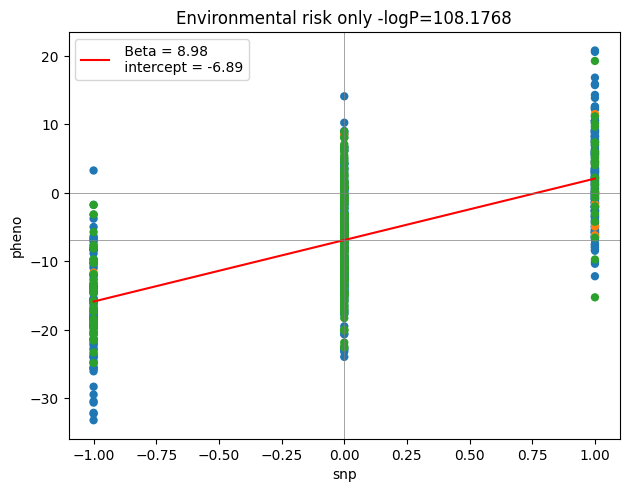

In [126]:
X = humans['snp']
y = humans['pheno']

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp']
intercept = model.params['const']
p_value = model.pvalues['snp']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_pheno'] = model.predict(X)

# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp', y='pheno', data=humans, hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp'], humans['predicted_pheno'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

In [ ]:
X = humans['snp']
y = humans['pheno']

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp']
intercept = model.params['const']
p_value = model.pvalues['snp']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_pheno'] = model.predict(X)

# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp', y='pheno', data=humans, hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp'], humans['predicted_pheno'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

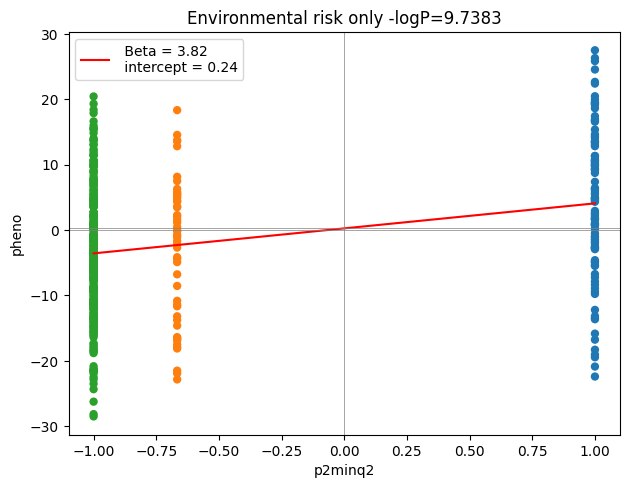

In [116]:
X = humans['p2minq2']
y = humans['pheno']

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['p2minq2']
intercept = model.params['const']
p_value = model.pvalues['p2minq2']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_pheno_p2minq2'] = model.predict(X)

# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='p2minq2', y='pheno', data=humans, hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['p2minq2'], humans['predicted_pheno_p2minq2'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

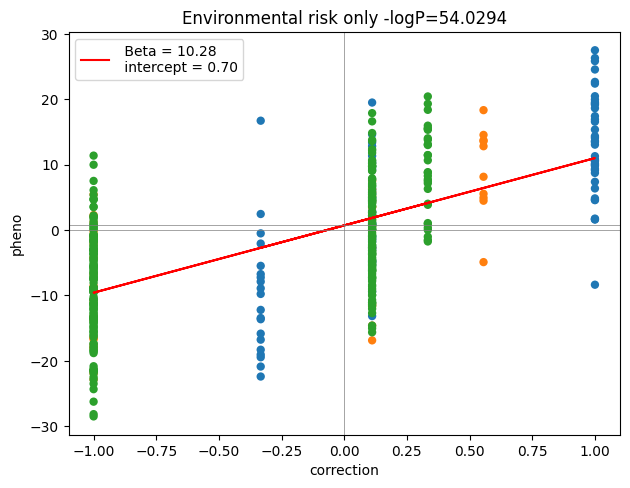

In [118]:
humans['correction'] = humans.apply(lambda row: row['minaf'] if row['snp'] == -1 else (row['hetaf'] if row['snp'] == 0 else row['majaf']), axis=1)
humans['correction'] = humans['correction']*humans['snp']
humans['correction'] = min_max_scaling(humans['correction'],-1,1)
X = humans['correction']
y = humans['pheno']

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['correction']
intercept = model.params['const']
p_value = model.pvalues['correction']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_pheno_correction'] = model.predict(X)

# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='correction', y='pheno', data=humans, hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['correction'], humans['predicted_pheno_correction'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

In [119]:
# Combination

In [121]:
humans['combined_pheno'] = humans['pheno']+humans['risk']

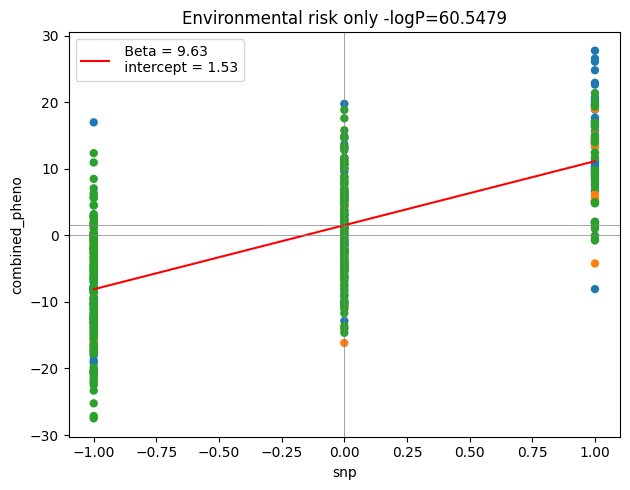

In [122]:
X = humans['snp']
y = humans['combined_pheno']

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['snp']
intercept = model.params['const']
p_value = model.pvalues['snp']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_pheno'] = model.predict(X)

# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='snp', y='combined_pheno', data=humans, hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['snp'], humans['predicted_pheno'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

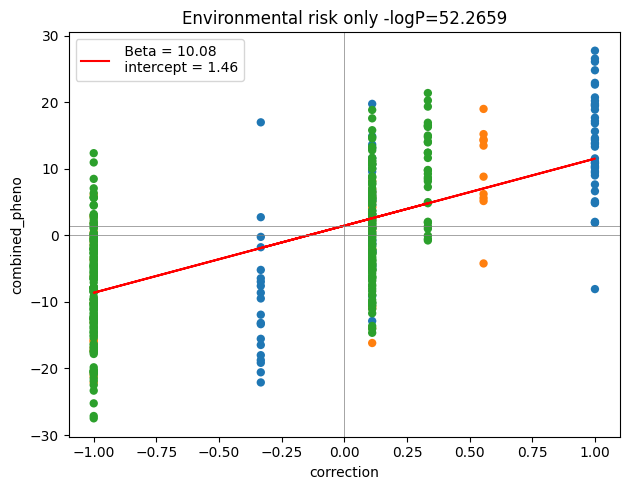

In [123]:
humans['correction'] = humans.apply(lambda row: row['minaf'] if row['snp'] == -1 else (row['hetaf'] if row['snp'] == 0 else row['majaf']), axis=1)
humans['correction'] = humans['correction']*humans['snp']
humans['correction'] = min_max_scaling(humans['correction'],-1,1)
X = humans['correction']
y = humans['combined_pheno']

# Add a constant to the predictor variable (for intercept)
X = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X).fit()

# Extract beta (slope), intercept, and p-value
beta = model.params['correction']
intercept = model.params['const']
p_value = model.pvalues['correction']
logp_value = np.round(-np.log10(p_value),4)

humans['predicted_pheno_correction'] = model.predict(X)

# Create the scatter plot with seaborn, using size to represent pop_quantity
sns.scatterplot(x='correction', y='combined_pheno', data=humans, hue='pop',sizes=(20, 200), linewidth=0, legend=False)

# Add the regression line to the plot (no size argument here, as it's a line)
plt.plot(humans['correction'], humans['predicted_pheno_correction'], color='red', label=f' Beta = {beta:.2f}\n intercept = {intercept:.2f}')

# Add thin gray lines at x = 0 and y = 0
plt.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=intercept, color='gray', linestyle='-', linewidth=0.5)  # Vertical line at x = 0
plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()
plt.title(f"Environmental risk only -logP={logp_value}")
plt.legend()

# Show the plot
plt.show()
plt.close()

In [140]:
humans['snp_AF_05'] = humans['snp']

In [132]:
beta_mafs_ols = manhattan_linear(humans[['snp_AF_05']], humans[['combined_pheno']], humans[['correction']])    
beta_mafs_ols

,snp,coefs,AFs,Ps,-logPs
0,snp,9.659144,05,7.435066e-10,9.128715


In [146]:
beta_mafs_ols = manhattan_linear(humans[['snp_AF_05']], humans[['risk']], humans[['p2minq2']])    
beta_mafs_ols

,snp,coefs,AFs,Ps,-logPs
0,snp,9.055257e-16,05,1.0,8.032848e-14


In [145]:
beta_mafs_ols = manhattan_linear(humans[['snp_AF_05']], humans[['risk']])    
beta_mafs_ols

,snp,coefs,AFs,Ps,-logPs
0,snp,-0.127121,05,1.430830e-12,11.844412
